<a href="https://colab.research.google.com/github/rlalramengi/Employee_Compensation_K-means/blob/main/Kmeans_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Reading Dataset

In [2]:
data = pd.read_csv("/content/drive/MyDrive/DataSet/employee-compensation.csv")
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


# Data Pre-Processing

Making a copy of our data

In [3]:
df = data.copy()

Marging Columns

In [4]:
df['Retirement & Other Benefits' ] = df['Retirement'] + df['Other Benefits'] +df['Health and Dental']

Checking The unique elements of columns

In [5]:
columns = df.columns
for column in columns:
  print(column , "Has... '{}' ...unique elements.".format(df[column].nunique()))

Organization Group Code Has... '7' ...unique elements.
Job Family Code Has... '59' ...unique elements.
Job Code Has... '1210' ...unique elements.
Year Type Has... '2' ...unique elements.
Year Has... '8' ...unique elements.
Organization Group Has... '7' ...unique elements.
Department Code Has... '60' ...unique elements.
Department Has... '109' ...unique elements.
Union Code Has... '70' ...unique elements.
Union Has... '129' ...unique elements.
Job Family Has... '59' ...unique elements.
Job Has... '1349' ...unique elements.
Employee Identifier Has... '309750' ...unique elements.
Salaries Has... '498512' ...unique elements.
Overtime Has... '262033' ...unique elements.
Other Salaries Has... '307854' ...unique elements.
Total Salary Has... '615223' ...unique elements.
Retirement Has... '451716' ...unique elements.
Health and Dental Has... '209969' ...unique elements.
Other Benefits Has... '496200' ...unique elements.
Total Benefits Has... '616499' ...unique elements.
Total Compensation Has.

Column to drop: Organization Group,Department,Union,Job Family,job,Salaries, Overtime, Other Salaries, Job Family Code, Job Code, Job Family Code

In [6]:
#Dropping columns

df.drop(['Organization Group','Department','Union','Job Family','Job','Salaries','Overtime','Other Salaries','Job Code','Department Code','Other Benefits',	'Total Benefits','Health and Dental', 'Retirement','Job Family Code' ], axis=1, inplace = True)

In [7]:
df.head()

,Organization Group Code,Year Type,Year,Union Code,Employee Identifier,Total Salary,Total Compensation,Retirement & Other Benefits
0,1,Calendar,2013,21.0,37730,57534.65,85281.78,27747.13
1,1,Calendar,2013,21.0,26574,57678.50,79895.32,22216.82
2,1,Calendar,2013,21.0,8148,63532.93,93649.71,30116.78
3,1,Calendar,2013,21.0,27436,94215.92,134237.37,40021.45
4,1,Calendar,2013,21.0,37730,5084.00,7512.31,2428.31


In [8]:
df.dtypes

Organization Group Code          int64
Year Type                       object
Year                             int64
Union Code                     float64
Employee Identifier              int64
Total Salary                   float64
Total Compensation             float64
Retirement & Other Benefits    float64
dtype: object



```
# This is formatted as code
```

Removed Null Values

In [9]:
df.isnull().sum()

Organization Group Code          0
Year Type                        0
Year                             0
Union Code                     351
Employee Identifier              0
Total Salary                     0
Total Compensation               0
Retirement & Other Benefits      0
dtype: int64

In [10]:
df = df.dropna()

#Encoding Year Type

In [11]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
df['Year Type'] = Le.fit_transform(df['Year Type'])

In [12]:
df.head(3)

,Organization Group Code,Year Type,Year,Union Code,Employee Identifier,Total Salary,Total Compensation,Retirement & Other Benefits
0,1,0,2013,21.0,37730,57534.65,85281.78,27747.13
1,1,0,2013,21.0,26574,57678.50,79895.32,22216.82
2,1,0,2013,21.0,8148,63532.93,93649.71,30116.78


# Creating Train set

In [13]:
train = df[['Retirement & Other Benefits','Total Compensation']]

In [14]:
df.describe()

,Organization Group Code,Year Type,Year,Union Code,Employee Identifier,Total Salary,Total Compensation,Retirement & Other Benefits
count,682926.000000,682926.000000,682926.000000,682926.000000,6.829260e+05,682926.000000,682926.000000,682926.000000
mean,2.977283,0.563601,2016.364568,492.532173,1.709588e+07,78601.820763,107256.929861,28655.109098
std,1.579452,0.495939,2.092685,330.911187,1.926008e+07,55745.989096,72282.992406,17866.967648
min,1.000000,0.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-74082.610000,-21295.150000
25%,2.000000,0.000000,2015.000000,250.000000,2.546300e+04,31755.925000,44540.077500,11747.450000
50%,2.000000,1.000000,2017.000000,535.000000,5.099500e+04,74894.220000,107562.980000,32528.805000
75%,4.000000,1.000000,2018.000000,790.000000,3.737713e+07,112692.272500,154201.667500,40920.925000
max,7.000000,1.000000,2020.000000,990.000000,4.434643e+07,658867.570000,807625.250000,151645.180000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


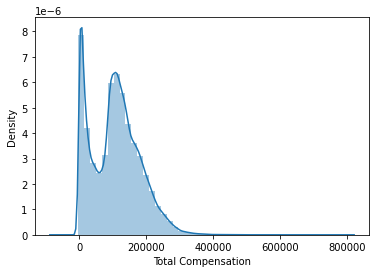

In [15]:
sns.distplot(df['Total Compensation'])
plt.show()

In [16]:
print("Skewness: %f" % df['Total Compensation'].skew())#Slop of graph
print("Kurtosis: %f" % df['Total Compensation'].kurt()) #slop of graph

Skewness: 0.409118
Kurtosis: 0.020103


In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans=KMeans(n_clusters=3)

In [19]:
df.columns

Index(['Organization Group Code', 'Year Type', 'Year', 'Union Code',
       'Employee Identifier', 'Total Salary', 'Total Compensation',
       'Retirement & Other Benefits'],
      dtype='object')

In [20]:
kmeans.fit(train)

KMeans(n_clusters=3)

In [21]:
print(kmeans.cluster_centers_)

[[ 33702.62356076 115518.86522416]
 [  6343.06770922  23560.18485171]
 [ 49446.78838895 207425.78882568]]


In [22]:
y=kmeans.labels_
print(y)

[0 0 0 ... 0 2 2]


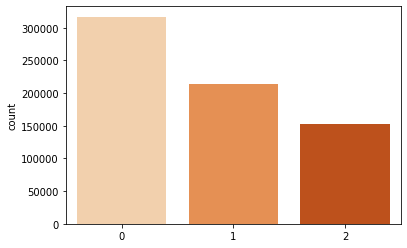

In [23]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

In [24]:
df.iloc[:,0].values, df.iloc[:,3].values

(array([1, 1, 1, ..., 6, 6, 6]),
 array([ 21.,  21.,  21., ..., 790., 790., 790.]))

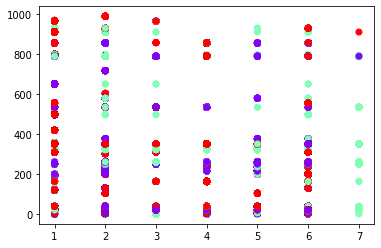

In [25]:
plt.scatter(df.iloc[:,0].values,df.iloc[:,3].values, c=kmeans.labels_, cmap="rainbow")
plt.show()